In [13]:
import numpy as np
import pandas as pd

In [15]:
headers_data = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", type(headers_data))

headers
 <class 'list'>


In [17]:
# 1. import data and see head, dtypes, info, describe 
# 2. replace ? to np.nan
# 3. check null values 
# 4. now fill value mean and mode from simpleimputer 
# 5. dropna row of null value in price columne and reset index
# 6. binnig of hoursepower col using pd.cut(col,bins,lable,include_lowest)
# 7. use salary data set and train_test_split
# 8. ColumnTransformer and onehoteencoder
# 9.  labelencoder

In [19]:
# df = pd.read_csv("dataset_1.data",names=headers_data)

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from  sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Emirates Airways Reviews.csv")

In [16]:
df.head(5)

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1540 non-null   object 
 1   Date Published   1540 non-null   object 
 2   Status           1398 non-null   object 
 3   Aircraft         1037 non-null   object 
 4   Travel Type      1540 non-null   object 
 5   Travel Class     1540 non-null   object 
 6   Route            1538 non-null   object 
 7   Date Flown       1540 non-null   object 
 8   Seating Comfort  1477 non-null   float64
 9   Staff Service    1476 non-null   float64
 10  Food Quality     1418 non-null   float64
 11  Entertainment    1380 non-null   float64
 12  WiFi             934 non-null    float64
 13  Ground Service   1501 non-null   float64
 14  Value for Money  1540 non-null   int64  
 15  Recommended      1540 non-null   object 
 16  Overall Rating   1540 non-null   int64  
 17  Review        

In [9]:
df.describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


In [11]:
df.isnull().sum()

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64

In [20]:
df[df.duplicated()]

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country


<Axes: xlabel='YearsExperience'>

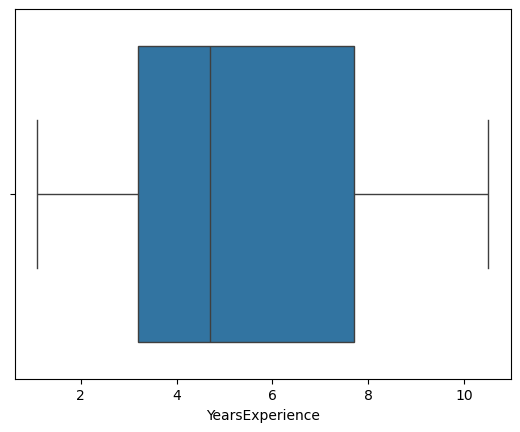

In [153]:
sns.boxplot(data=df,x='YearsExperience')

In [154]:
stats.skew(df['YearsExperience'])

0.3603123252525561

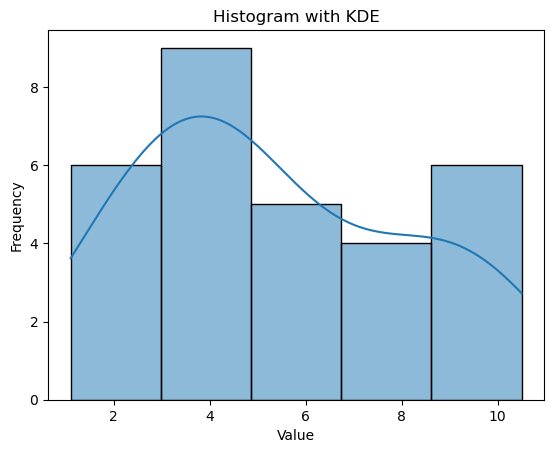

In [155]:
# plt.figure(figsize=(8, 6))
sns.histplot(df['YearsExperience'], kde=True, bins=5) # kde=True adds a kernel density estimate
plt.title('Histogram with KDE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [76]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# x.head(5)
x['country'].unique()

array(['Dubai', 'Canada', 'USA', 'Australia'], dtype=object)

In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.2,stratify=x['country'],random_state=42)

In [80]:
X_train['country'].unique()

array(['USA', 'Canada', 'Australia', 'Dubai'], dtype=object)

In [82]:
ct = ColumnTransformer([
    ('encode',OneHotEncoder(handle_unknown='ignore'),[0])
],remainder='passthrough')

In [84]:
X_train = pd.DataFrame(ct.fit_transform(X_train))
X_test = pd.DataFrame(ct.transform(X_test))

In [86]:
X_train.head(5)

,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,67938.0,4.9
1,0.0,1.0,0.0,0.0,91738.0,6.8
2,1.0,0.0,0.0,0.0,54445.0,3.2
3,0.0,0.0,1.0,0.0,39343.0,1.1
4,0.0,0.0,1.0,0.0,109431.0,8.7


In [88]:
ms = MinMaxScaler()

In [90]:
X_train.iloc[:,4:] = ms.fit_transform(X_train.iloc[:,4:])
X_test.iloc[:,4:] = ms.transform(X_test.iloc[:,4:])

In [92]:
X_train.head(5)

,0,1,2,3,4,5
0,0.0,0.0,0.0,1.0,0.407987,0.500000
1,0.0,1.0,0.0,0.0,0.747560,0.750000
2,1.0,0.0,0.0,0.0,0.215472,0.276316
3,0.0,0.0,1.0,0.0,0.000000,0.000000
4,0.0,0.0,1.0,0.0,1.000000,1.000000


In [94]:
columns = ['USA', 'Canada', 'Australia', 'Dubai','Salary','YearsExperience']
X_train.columns =  columns
X_test.columns = columns
X_train.head(3)

,USA,Canada,Australia,Dubai,Salary,YearsExperience
0,0.0,0.0,0.0,1.0,0.407987,0.500000
1,0.0,1.0,0.0,0.0,0.747560,0.750000
2,1.0,0.0,0.0,0.0,0.215472,0.276316


In [96]:
lb = LabelEncoder()

In [102]:
y_train =  pd.DataFrame(lb.fit_transform(y_train))
y_test = pd.DataFrame(lb.transform(y_test))
y_train.head(5)

,0
0,0
1,0
2,0
3,0
4,0


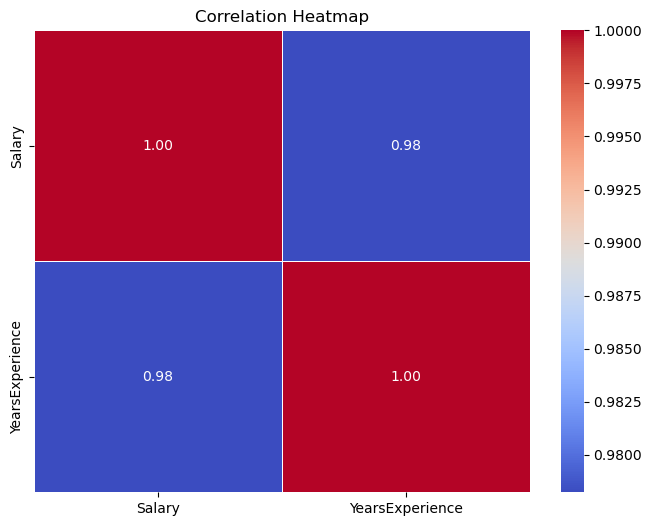

In [13]:
    plt.figure(figsize=(8, 6)) # Adjust figure size as needed
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

In [112]:
dataset = pd.read_excel('emp_bonus.xlsx',usecols=['Designation','Department','Age','Salary','Bonus'])
dataset.head(3)

,Designation,Department,Age,Salary,Bonus
0,Manager,Accounts,50.0,200000.0,100000.0
1,Officer,IT,30.0,80000.0,24000.0
2,Officer,HR,28.0,NaN,NaN


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Designation  18 non-null     object 
 1   Department   16 non-null     object 
 2   Age          17 non-null     float64
 3   Salary       15 non-null     float64
 4   Bonus        15 non-null     float64
dtypes: float64(3), object(2)
memory usage: 852.0+ bytes


In [154]:
dataset.isnull().sum()

Designation    0
Department     0
Age            0
Salary         3
Bonus          3
dtype: int64

In [144]:
dataset.fillna({'Department':dataset['Department'].mode()[0]},inplace=True)
# df.method({col: value}, inplace=True)

In [152]:
dataset.fillna({'Age':dataset['Age'].mean()},inplace=True)
dataset['Age'] = dataset['Age'].astype(int)

<Axes: xlabel='Salary', ylabel='Count'>

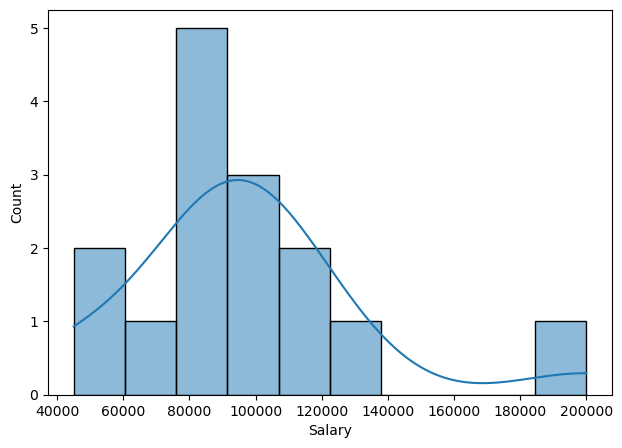

In [162]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(dataset['Salary'],kde=True)

<Axes: xlabel='Salary'>

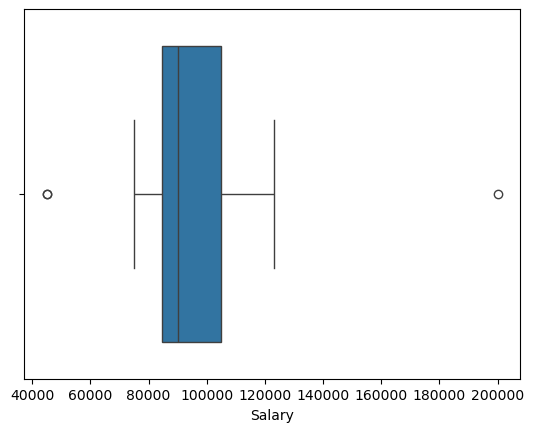

In [198]:
sns.boxplot(data=dataset,x='Salary')

In [166]:
percentile25 = dataset['Salary'].quantile(0.25)
percentile75 = dataset['Salary'].quantile(0.75)

In [168]:
iqr = percentile75 - percentile25

In [172]:
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

In [188]:
upper_limit = dataset['Salary'].quantile(0.99)
lower_limit = dataset['Salary'].quantile(0.01)

In [190]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 189219.99999999994
lower_limit 45000.0


In [192]:
dataset[dataset['Salary'] < lower_limit]

,Designation,Department,Age,Salary,Bonus


In [194]:
new_data = dataset[(dataset['Salary'] > lower_limit) & (dataset['Salary'] < upper_limit)]
new_data.head(5)

,Designation,Department,Age,Salary,Bonus
1,Officer,IT,30,80000.0,24000.0
3,Manager,HR,45,120000.0,48000.0
5,Accountant,IT,34,100000.0,30000.0
6,Accountant,Accounts,34,110000.0,11000.0
7,Officer,IT,25,75000.0,15000.0


<Axes: xlabel='Salary'>

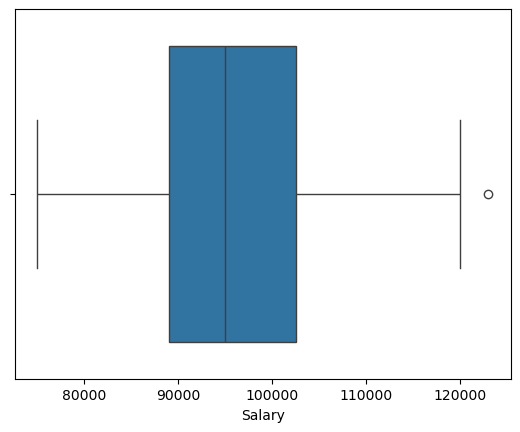

In [196]:
sns.boxplot(data=new_data,x='Salary')

In [200]:
new_data.fillna({'Salary':new_data['Salary'].mean()},inplace=True)

C:\Users\HD\AppData\Local\Temp\ipykernel_9460\1224088892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.fillna({'Salary':new_data['Salary'].mean()},inplace=True)


In [118]:
dataset['Designation'].unique()

array(['Manager', 'Officer', 'Office Boy', 'Accountant', 'Engineer'],
      dtype=object)

In [120]:
dataset['Department'].unique()

array(['Accounts', 'IT', 'HR', nan, 'Production', 'Account'], dtype=object)

<Axes: >

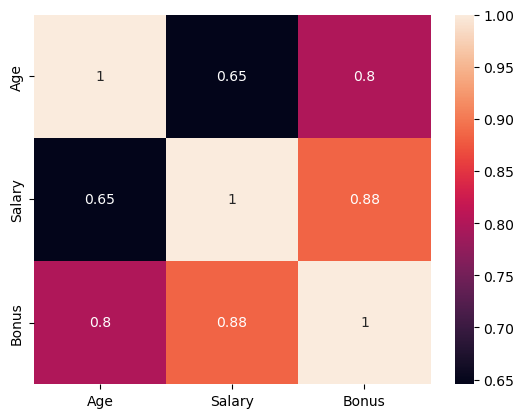

In [114]:
sns.heatmap(dataset.corr(numeric_only=True),annot=True)